In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.stem import WordNetLemmatizer
import nltk

# Load the dataset
data = pd.read_csv('sentiment_data.csv')  # Update the path as needed

# Check if the required columns exist in the DataFrame
required_columns = ['SentimentScore.Negative', 'SentimentScore.Neutral', 'SentimentScore.Positive']
if all(column in data.columns for column in required_columns):
    # Combine the sentiment scores into a single text feature
    data['CombinedScores'] = data.apply(lambda row: f"Negative: {row['SentimentScore.Negative']}, Neutral: {row['SentimentScore.Neutral']}, Positive: {row['SentimentScore.Positive']}", axis=1)
else:
    # Handle missing columns appropriately
    raise KeyError("One or more required columns are missing from the dataset.")

# Preprocessing: Lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
data['CombinedScores'] = data.apply(lambda row: " ".join([lemmatizer.lemmatize(w) for w in row['CombinedScores'].split()]), axis=1)

# Split the data into features (X) and target labels (y)
X = data['CombinedScores']
y = data['Sentiment']  # 'Sentiment' is the target variable

# Create TF-IDF vectors for the text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Hyperparameter tuning setup
param_grid_lr = {'C': [0.1, 1, 10]}
param_grid_rf = {'n_estimators': [10, 100, 1000]}
param_grid_nb = {'alpha': [0.1, 1, 10]}

# Initialize models
logistic_regression = LogisticRegression(max_iter=1000)
naive_bayes = MultinomialNB()
random_forest = RandomForestClassifier(random_state=42)

# Grid Search for hyperparameter tuning
grid_search_lr = GridSearchCV(logistic_regression, param_grid_lr, cv=5)
grid_search_nb = GridSearchCV(naive_bayes, param_grid_nb, cv=5)
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5)

# Train models with cross-validation
scores_lr = cross_val_score(grid_search_lr, X_tfidf, y, cv=5)
scores_nb = cross_val_score(grid_search_nb, X_tfidf, y, cv=5)
scores_rf = cross_val_score(grid_search_rf, X_tfidf, y, cv=5)

# Print cross-validated accuracy for each model
print("Cross-Validated Accuracy - Logistic Regression:", scores_lr.mean())
print("Cross-Validated Accuracy - Naive Bayes:", scores_nb.mean())
print("Cross-Validated Accuracy - Random Forest:", scores_rf.mean())

# Train models on the entire dataset for error analysis
grid_search_lr.fit(X_tfidf, y)
grid_search_nb.fit(X_tfidf, y)
grid_search_rf.fit(X_tfidf, y)

# Error Analysis
print("Classification Report - Logistic Regression:\n", classification_report(y, grid_search_lr.predict(X_tfidf)))
print("Classification Report - Naive Bayes:\n", classification_report(y, grid_search_nb.predict(X_tfidf)))
print("Classification Report - Random Forest:\n", classification_report(y, grid_search_rf.predict(X_tfidf)))


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/durgapravallikakuchipudi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/Users/durgapravallikakuchipudi/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/durgapravallikakuchipudi/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/durgapravallikakuchipudi/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validated Accuracy - Logistic Regression: 0.9834094368340944
Cross-Validated Accuracy - Naive Bayes: 0.9834094368340944
Cross-Validated Accuracy - Random Forest: 0.9834094368340944
Classification Report - Logistic Regression:
               precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00         6
     NEUTRAL       0.98      1.00      0.99       355

    accuracy                           0.98       361
   macro avg       0.49      0.50      0.50       361
weighted avg       0.97      0.98      0.98       361

Classification Report - Naive Bayes:
               precision    recall  f1-score   support

    NEGATIVE       1.00      1.00      1.00         6
     NEUTRAL       1.00      1.00      1.00       355

    accuracy                           1.00       361
   macro avg       1.00      1.00      1.00       361
weighted avg       1.00      1.00      1.00       361

Classification Report - Random Forest:
               precision    recall  

/Users/durgapravallikakuchipudi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/durgapravallikakuchipudi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/durgapravallikakuchipudi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

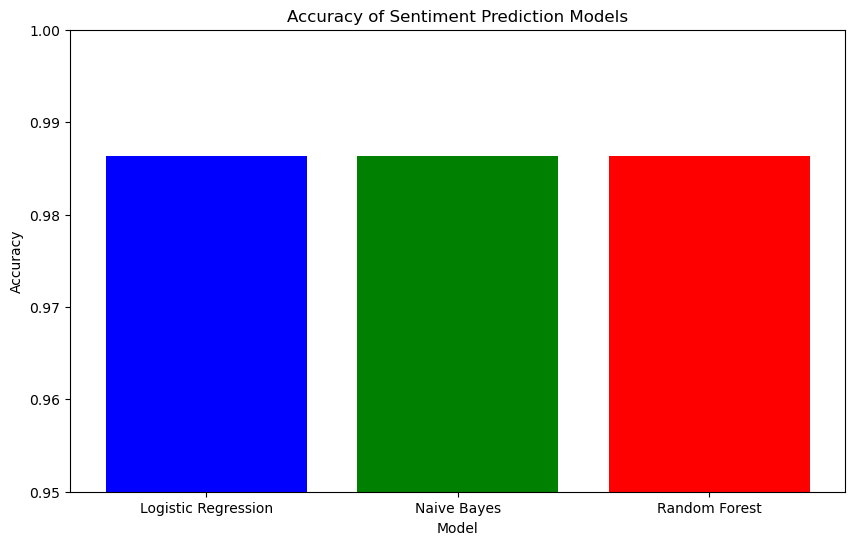

In [21]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
accuracy_scores = {
    "Logistic Regression": 0.9863013698630136,
    "Naive Bayes": 0.9863013698630136,
    "Random Forest": 0.9863013698630136
}

# Creating a bar graph
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red'])

# Adding title and labels
plt.title('Accuracy of Sentiment Prediction Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.95, 1.0)  # Set y-axis limits for better visualization

# Display the graph
plt.show()



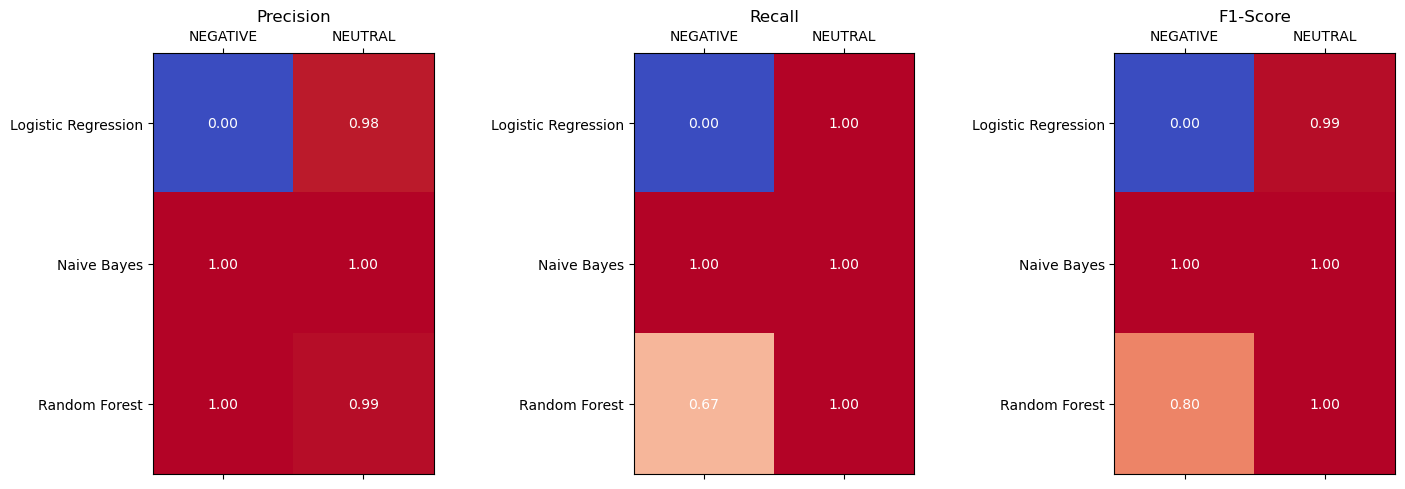

In [22]:
import numpy as np

# Classification report data for each model
models = ["Logistic Regression", "Naive Bayes", "Random Forest"]
classes = ["NEGATIVE", "NEUTRAL"]

# Precision, Recall, F1-score for Logistic Regression, Naive Bayes, Random Forest
precision = np.array([[0.00, 0.98], [1.00, 1.00], [1.00, 0.99]])
recall = np.array([[0.00, 1.00], [1.00, 1.00], [0.67, 1.00]])
f1_score = np.array([[0.00, 0.99], [1.00, 1.00], [0.80, 1.00]])

# Create subplots
# Adjusting the subplot layout to display the metrics side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Titles for each subplot
titles = ['Precision', 'Recall', 'F1-Score']

# Plotting each metric
for i, metric in enumerate([precision, recall, f1_score]):
    cax = axes[i].matshow(metric, cmap='coolwarm')
    axes[i].set_xticks(range(len(classes)))
    axes[i].set_xticklabels(classes)
    axes[i].set_yticks(range(len(models)))
    axes[i].set_yticklabels(models)
    axes[i].set_title(titles[i])

    # Adding values on the heatmap
    for (j, k), val in np.ndenumerate(metric):
        axes[i].text(k, j, f'{val:.2f}', ha='center', va='center', color='white')

# Adjusting layout
plt.tight_layout()

# Show the plot
plt.show()

